# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [1]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px

In [2]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [3]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()

In [4]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [5]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [6]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

newStateData = pd.DataFrame()

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [7]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

newStateData = pd.DataFrame()

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [8]:
stateData = stateData.fillna(0)
stateData

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,...,04-09-2020,04-10-2020,04-11-2020,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020
Washington,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9639,10119,10434,10609,10635,10799,10942,11057,11517,11776
Illinois,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,15079,17887,19180,20852,22025,23248,24593,25734,27578,29160
Arizona,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3018,3112,3393,3542,3705,3809,3964,4237,4511,4724
California,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,19710,21081,21706,22795,23931,25356,26686,27677,29157,30491
Massachusetts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18941,20974,22860,25475,26867,28164,29918,32181,34402,36372
Wisconsin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2886,3068,3213,3341,3428,3555,3721,3875,4053,4199
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11208,12105,13023,13677,14275,15006,15907,16876,17849,18704
Nebraska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,568,635,699,791,814,897,901,952,1066,1249
Oregon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1321,1322,1371,1527,1584,1633,1663,1736,1785,1844
Rhode Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1727,1727,2349,2665,2665,3251,3251,3529,4177,4491


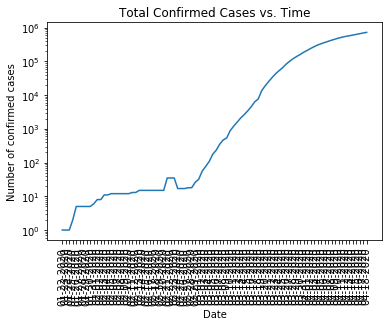

In [11]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

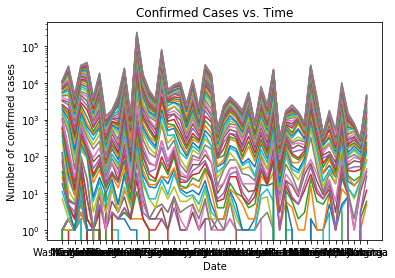

In [50]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':])

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')


plt.show()

## Convert Data into an Array

In [35]:
# Select data with few initial conditions of 0
scaledData = stateData.loc[:,'03-10-2020':] # starting March 10th
scaledData

,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,...,04-09-2020,04-10-2020,04-11-2020,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020
Washington,267.0,366.0,442.0,568.0,572.0,643.0,904.0,1076.0,1014.0,1376.0,...,9639,10119,10434,10609,10635,10799,10942,11057,11517,11776
Illinois,12.0,25.0,32.0,46.0,64.0,93.0,105.0,161.0,162.0,422.0,...,15079,17887,19180,20852,22025,23248,24593,25734,27578,29160
Arizona,6.0,9.0,9.0,9.0,12.0,13.0,18.0,20.0,27.0,45.0,...,3018,3112,3393,3542,3705,3809,3964,4237,4511,4724
California,144.0,177.0,221.0,282.0,340.0,426.0,557.0,698.0,751.0,952.0,...,19710,21081,21706,22795,23931,25356,26686,27677,29157,30491
Massachusetts,92.0,95.0,108.0,123.0,138.0,164.0,197.0,218.0,218.0,328.0,...,18941,20974,22860,25475,26867,28164,29918,32181,34402,36372
Wisconsin,3.0,6.0,8.0,19.0,27.0,32.0,47.0,72.0,92.0,159.0,...,2886,3068,3213,3341,3428,3555,3721,3875,4053,4199
Texas,13.0,21.0,27.0,43.0,57.0,72.0,85.0,110.0,173.0,260.0,...,11208,12105,13023,13677,14275,15006,15907,16876,17849,18704
Nebraska,3.0,5.0,10.0,13.0,14.0,17.0,18.0,21.0,24.0,29.0,...,568,635,699,791,814,897,901,952,1066,1249
Oregon,15.0,19.0,24.0,30.0,32.0,36.0,39.0,66.0,68.0,88.0,...,1321,1322,1371,1527,1584,1633,1663,1736,1785,1844
Rhode Island,3.0,5.0,5.0,14.0,20.0,20.0,21.0,23.0,33.0,44.0,...,1727,1727,2349,2665,2665,3251,3251,3529,4177,4491


In [36]:
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[2.6700e+02, 3.6600e+02, 4.4200e+02, ..., 1.1057e+04, 1.1517e+04,
        1.1776e+04],
       [1.2000e+01, 2.5000e+01, 3.2000e+01, ..., 2.5734e+04, 2.7578e+04,
        2.9160e+04],
       [6.0000e+00, 9.0000e+00, 9.0000e+00, ..., 4.2370e+03, 4.5110e+03,
        4.7240e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.2800e+02, 7.7500e+02,
        7.8500e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.9600e+02, 3.0500e+02,
        3.0900e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.3450e+03, 4.5710e+03,
        4.7120e+03]])

## Take DMD

**Modes**: Columns are the low-rank structures individuated


**Dynamics**: Rows refer to the time evolution of each mode


**Eigs**: eigenvalues of the low dimensional operator

* If an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively.

**Reconstructed_data**: the approximated system evolution

### DMD

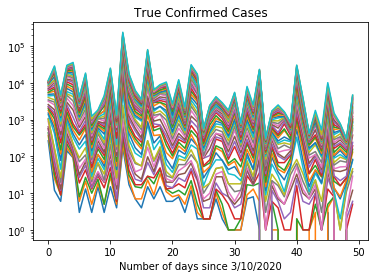

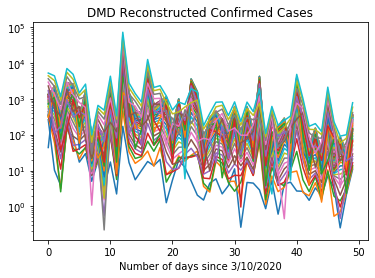

In [52]:
dmd = DMD()
dmd.fit(scaledData) # transpose so snapshots (state data) are arranged by column

# plot true data
plt.title('True Confirmed Cases')
plt.plot(scaledData)
plt.xlabel('Number of days since 3/10/2020')
plt.yscale('log')
plt.show()

# plot dmd reconstructed data
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(abs(dmd.reconstructed_data.real))
plt.xlabel('Number of days since 3/10/2020')
plt.yscale('log')
plt.show()

Eigenvalue (1.147889152868782+0j): distance from unit circle 0.3176495072738099
Eigenvalue (1.0587033530051642+0.10920226075630757j): distance from unit circle 0.13277792341866568
Eigenvalue (1.0587033530051642-0.10920226075630757j): distance from unit circle 0.13277792341866568
Eigenvalue (0.8008538607413355+0.38715892968054366j): distance from unit circle 0.20874105690431344
Eigenvalue (0.8008538607413355-0.38715892968054366j): distance from unit circle 0.20874105690431344
Eigenvalue (0.9206407694965061+0j): distance from unit circle 0.15242057354088112
Eigenvalue (0.4057842052148759+0.6105445777439703j): distance from unit circle 0.46257449738556844
Eigenvalue (0.4057842052148759-0.6105445777439703j): distance from unit circle 0.46257449738556844
Eigenvalue (-0.12828371268085634+0.42041280098330885j): distance from unit circle 0.8067963658301842
Eigenvalue (-0.12828371268085634-0.42041280098330885j): distance from unit circle 0.8067963658301842
Eigenvalue (0.26286452482665246+0.2876

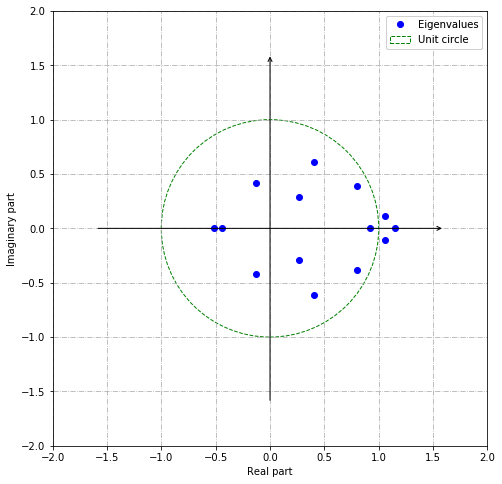

In [47]:
# eigenvalues of low dim operator

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

The eigenvalues are discrete, so their placement corresponds to the time sequences below:

![title](img/rootLocusPoleLocations.PNG)

All eigenvalues inside of the unit circle converge to a final value, while the three eigenvalues outside of the unit circle are unstable (do not converge).  The unstable eigenvalues correspond to three unstable modes.  Most eigenvalues are located on the positive real axis, corresponding to low frequency dynamics.

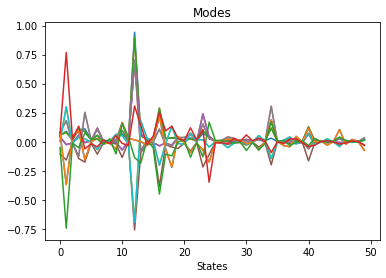

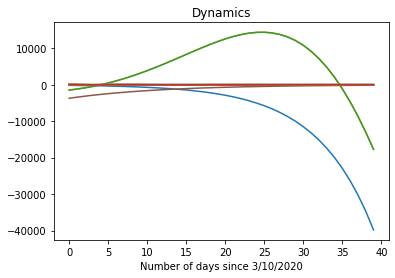

In [61]:
# modes
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('States')
plt.show()

# dynamics
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Number of days since 3/10/2020')
plt.show()

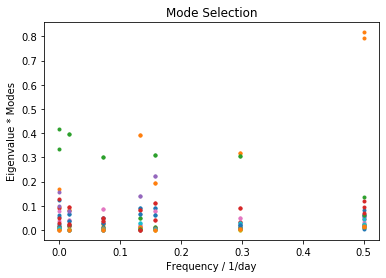

In [62]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [93]:
# Modes map

dmd = DMD(svd_rank=1)
dmd.fit(scaledData) # transpose so snapshots (state data) are arranged by column


with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=abs(dmd.modes.real),
                           range_color=(0, 0.2),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### DMDc

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

In [78]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(39))

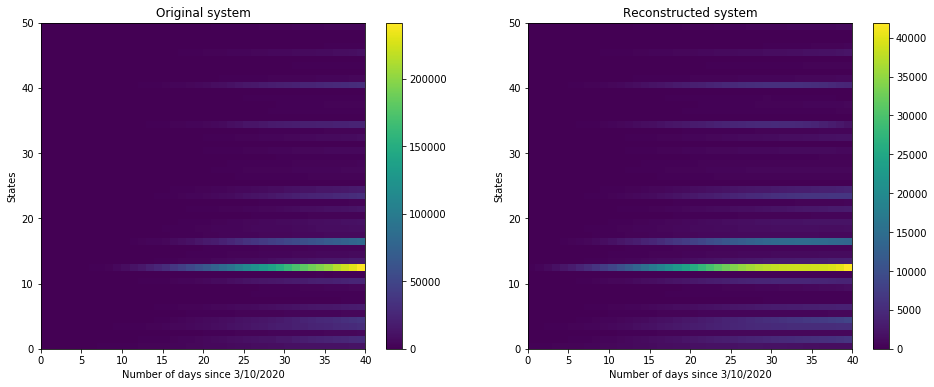

In [79]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Number of days since 3/10/2020')
plt.ylabel('States')
plt.pcolor(scaledData)
plt.colorbar()

plt.subplot(122)
plt.title('Reconstructed system')
plt.xlabel('Number of days since 3/10/2020')
plt.ylabel('States')
plt.pcolor(dmdc.reconstructed_data().real)
plt.colorbar()

plt.show()

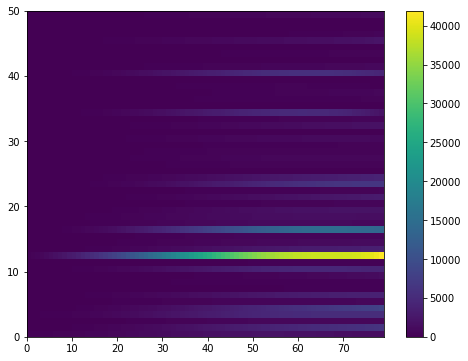

In [90]:
dmdc.dmd_time['dt'] = .5
u = np.random.rand(1,1)-.5
new_u = np.random.rand(u.shape[0], dmdc.dynamics.shape[1]-1)

plt.figure(figsize=(8,6))
plt.pcolor(dmdc.reconstructed_data(new_u).real)
plt.colorbar()
plt.show()

### Prediction

In [29]:
dmd = DMD()
prediction = np.zeros((50,10))
pydmd.DMD.predict(prediction)

NameError: name 'pydmd' is not defined

In [112]:
scaledDataLoc[-1,:]

array([1.78010703, 1.96099946, 2.08557402, 2.02238227, 1.93312907,
       2.33048501, 2.32474605, 1.99513569, 2.13948631, 1.67650427,
       1.76894538, 2.21942517, 2.11900365, 2.35249945, 2.11956269,
       2.37059158, 1.7977496 , 1.96363392, 2.39760031, 2.32568908,
       1.93946911, 2.00069828, 2.27940601, 2.08764083, 1.62640603,
       2.26823603, 1.83313319, 2.06138128, 2.09005708, 2.15870245,
       1.97410801, 2.12675053, 2.11720824, 2.18564   , 2.00992372,
       1.89988494, 2.19730105, 2.5779421 , 2.03321847, 3.09457443,
       1.94723613, 2.19511579, 1.94962851, 1.69705725, 2.32117049,
       1.59341536, 2.10792544, 1.89946026, 1.75205775, 2.24262383])